# Importamos las librerias

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from missforest import MissForest
import missingno as msno
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Importamos el DataFrame

In [63]:
df = pd.read_csv(r"/workspaces/carlos060495-intro-ml/data/raw/bank-marketing-campaign-data.csv", sep=";")
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [64]:
df.shape

(41188, 21)

# 1.1 Identificar y eliminar columnas con valores contantes

In [65]:
unicos = df.nunique()
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
41183
41184
41185
41186


# 1.2 Eliminamos filas y columnas duplicadas

In [66]:
df.duplicated().sum()

np.int64(12)

In [123]:
filas_duplicadas = df[df.duplicated(keep=False)]
if len(filas_duplicadas) > 0:
    print(f"Total de filas duplicadas: {len(filas_duplicadas)}")
    print("\nFilas duplicadas:")
    display(filas_duplicadas.sort_values(by=list(df.columns)))
else:
    print("No hay filas duplicadas")

Total de filas duplicadas: 3292

Filas duplicadas:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
37284,19,student,single,basic.9y,no,no,no,cellular,aug,mon,1,3,1,-2.9,92.201,-31.4,0.884,5076.2,no,0
37301,19,student,single,basic.9y,no,no,no,cellular,aug,mon,1,3,1,-2.9,92.201,-31.4,0.884,5076.2,no,0
31198,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,1,999,0,-1.8,92.893,-46.2,1.334,5099.1,no,0
31205,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,1,999,0,-1.8,92.893,-46.2,1.334,5099.1,no,0
14865,21,admin.,single,high.school,no,yes,no,cellular,jul,wed,1,999,0,1.4,93.918,-42.7,4.957,5228.1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27817,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,2,999,0,-1.8,92.843,-50.0,1.663,5099.1,yes,1
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,no,0
27812,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,no,0
27810,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,yes,1


In [68]:
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df.shape[0]}")
df.shape

Filas después de eliminar duplicados: 41176


(41176, 21)

In [69]:
df.T.duplicated().sum()

np.int64(0)

In [70]:
df.T.duplicated(keep=False)

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

# 1.3 Eliminar columnas redundantes

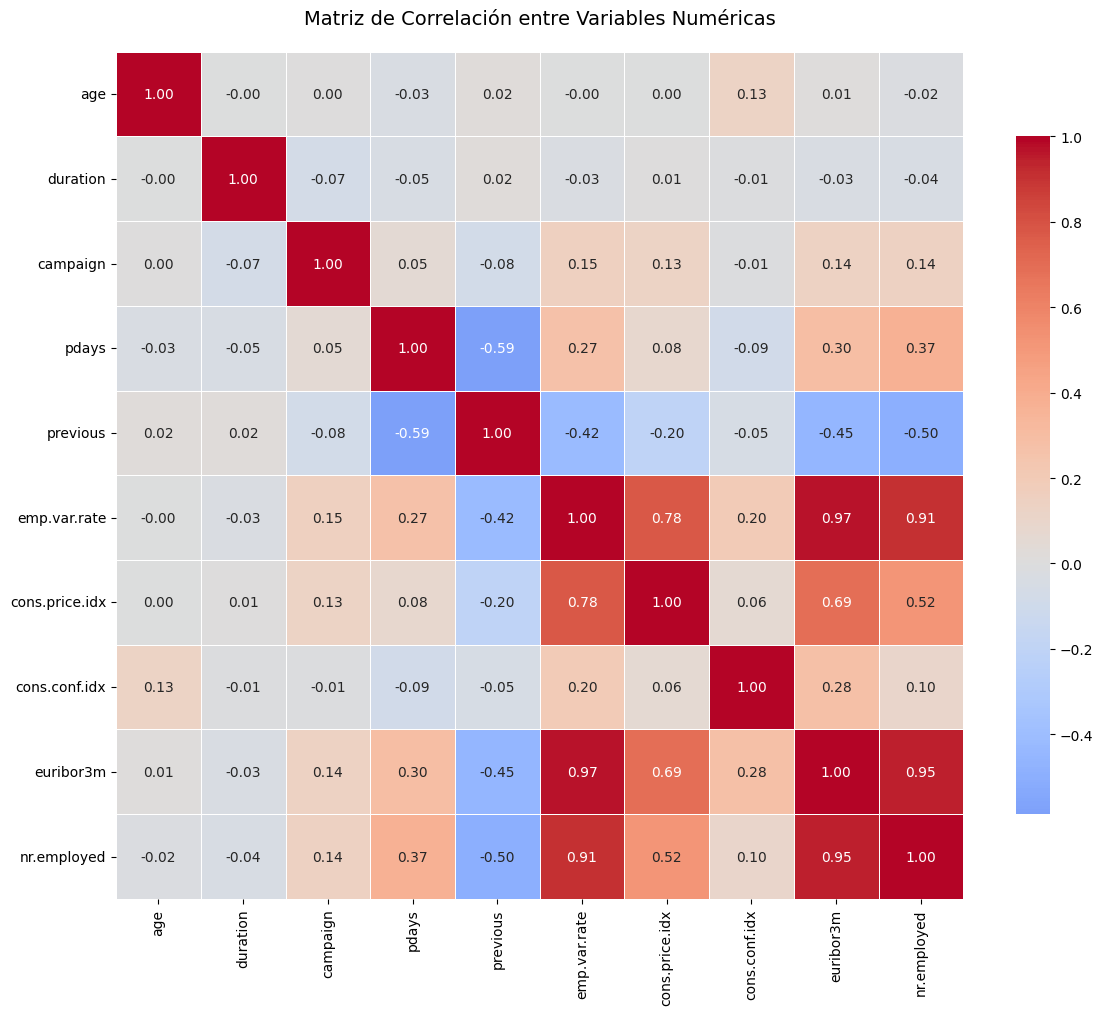


Pares de variables con alta correlación (|r| > 0.8):
  emp.var.rate <-> euribor3m: 0.972
  emp.var.rate <-> nr.employed: 0.907
  euribor3m <-> nr.employed: 0.945


In [71]:
# Crear variable objetivo binaria
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})

# Seleccionar solo columnas numéricas (excluyendo la variable objetivo)
num_cols = df.select_dtypes(include=[np.number]).drop(['y_bin'], axis=1).columns

# Matriz de correlación entre variables predictoras
corr_matrix = df[num_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Identificar pares de variables con alta correlación (>0.8 o <-0.8)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], 
                                   corr_matrix.columns[j], 
                                   corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nPares de variables con alta correlación (|r| > 0.8):")
    for var1, var2, corr_val in high_corr_pairs:
        print(f"  {var1} <-> {var2}: {corr_val:.3f}")
else:
    print("\nNo se encontraron pares de variables con correlación > 0.8")

**Conclusión:**

Se identificaron 3 variables con alta correlación entre sí (> 0.8):
- `emp.var.rate` ↔ `euribor3m`: 0.97
- `emp.var.rate` ↔ `nr.employed`: 0.91
- `euribor3m` ↔ `nr.employed`: 0.95

Estas variables forman un grupo de indicadores macroeconómicos altamente correlacionados. **La decisión de eliminar alguna de ellas se tomará en la fase de selección de características**, donde se evaluará también su importancia predictiva y su VIF.

# 1.4 Eliminar columnas Data leakage

La columna 'duration' se elimina porque su valor solo se conoce después de la interacción con el cliente, lo que introduce data leakage; en otras palabras, el modelo estaría aprendiendo de un dato que depende directamente del resultado de la llamada, generando un entrenamiento poco realista y un desempeño engañoso en producción.


In [72]:
df = df.drop(['duration'], axis=1)
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


# 1.5 Valores faltantes

In [73]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

Series([], dtype: float64)

In [74]:
df.isnull().any(axis=1).sum()

np.int64(0)

# 1.5.1 Realizamos una busqueda profunda de valores faltantes

In [75]:
# Recorro las columnas para realizar una busqueda por sus valores por si encontramos valores faltantes enmascarados
for columna in df.columns:
    print(df[columna].value_counts())

age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
housing
yes        21571
no         18615
unknown      990
Name: count, 

In [76]:
# Encontramos valores como unknown y nonexistent en el dataframe y mostramos las columnas en las que existen
valores_a_filtrar = ['unknown', 'nonexistent']
mask_columnas = df.isin(valores_a_filtrar).any(axis=0)
df_filtrado = df.loc[:, mask_columnas]
print(df_filtrado)


               job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

          poutcome  
0      nonexistent  
1      nonexistent  
2      nonexistent  
3      nonexistent  
4     

In [77]:
# Cargar el dataframe original nuevamente para verificar antes de reemplazar
df_temp = pd.read_csv(r"/workspaces/carlos060495-intro-ml/data/raw/bank-marketing-campaign-data.csv", sep=";")

# Verificar si 'nonexistent' en poutcome coincide con previous = 0
nonexistent_poutcome = df_temp['poutcome'] == 'nonexistent'
previous_zero = df_temp['previous'] == 0

# Tabla de contingencia
coincidencias = pd.crosstab(nonexistent_poutcome, previous_zero, 
                             rownames=['poutcome==nonexistent'], 
                             colnames=['previous==0'])

print("Tabla de contingencia:")
print(coincidencias)
print("\n" + "="*60)

# Calcular coincidencias exactas
total_nonexistent = nonexistent_poutcome.sum()
total_previous_0 = previous_zero.sum()
ambos_true = (nonexistent_poutcome & previous_zero).sum()

print(f"\nTotal de registros con poutcome='nonexistent': {total_nonexistent}")
print(f"Total de registros con previous=0: {total_previous_0}")
print(f"Registros donde AMBOS son True: {ambos_true}")
print(f"\nPorcentaje de coincidencia: {(ambos_true/total_nonexistent)*100:.2f}%")

Tabla de contingencia:
previous==0            False  True 
poutcome==nonexistent              
False                   5625      0
True                       0  35563


Total de registros con poutcome='nonexistent': 35563
Total de registros con previous=0: 35563
Registros donde AMBOS son True: 35563

Porcentaje de coincidencia: 100.00%


In [78]:
# Reemplazamos los valores faltantes enmascarados por valores nulos
df = df.replace(['unknown', 'nonexistent'], np.nan)
print(df)


       age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school     NaN      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  campaign  pdays  previous p

In [79]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

job           0.801438
marital       0.194288
education     4.201477
default      20.876239
housing       2.404313
loan          2.404313
poutcome     86.339130
dtype: float64

<Axes: >

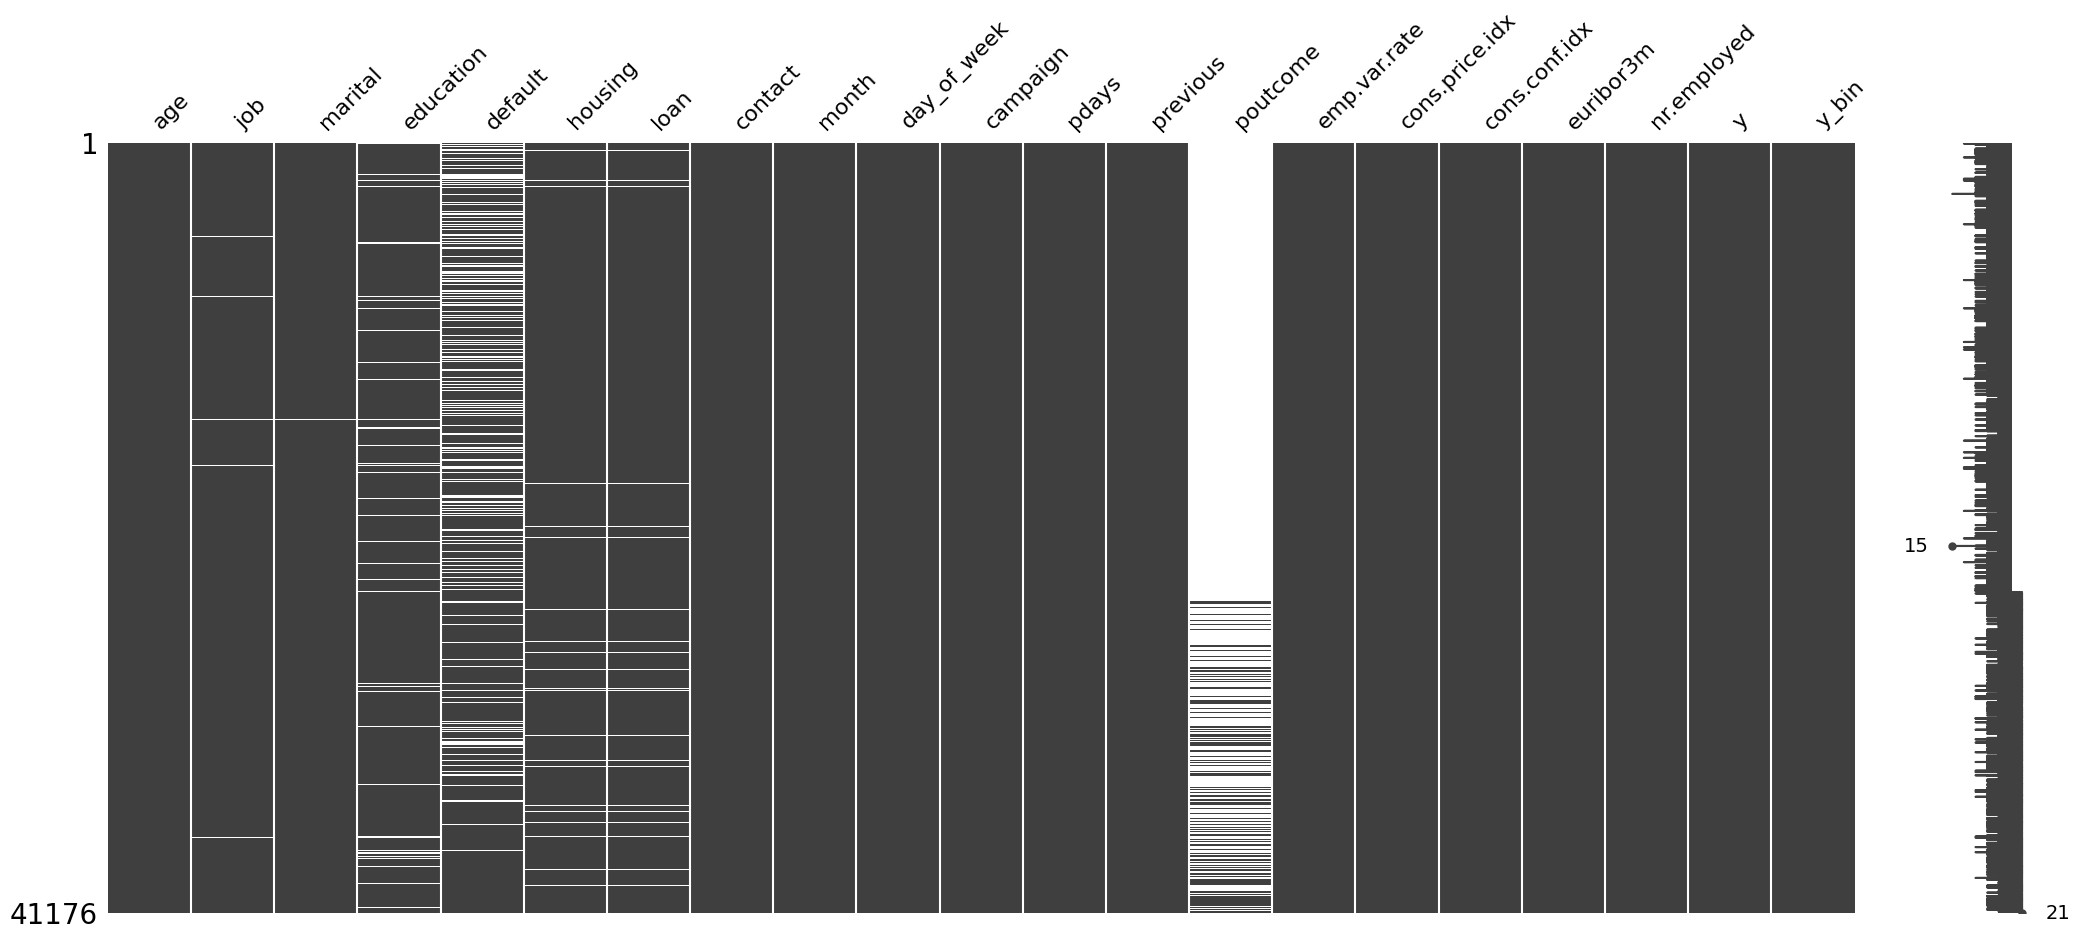

In [80]:
msno.matrix(df)

In [81]:
# Eliminamos la columna poutcome por ser redundante con previous (100% de coincidencia entre 
# 'nonexistent' y previous=0) y por la alta cantidad de valores faltantes en esta columna
df.drop("poutcome", axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1


Mantenemos las demas columnas con valores nulos ya que tienen un porcentaje aceptable de datos nulos y podrian ser importantes para realizar la prediccion

# 2.1 Train test split

In [82]:
X = df.drop(['y', 'y_bin'], axis=1)
y = df['y_bin']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2 Codificación e Imputación

Transformamos las variables categóricas a numéricas y manejamos los valores faltantes usando MissForest.

In [84]:
# Muestro las columnas con valores nulos para proceder a la imputacion de elementos
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

job           0.801438
marital       0.194288
education     4.201477
default      20.876239
housing       2.404313
loan          2.404313
dtype: float64

In [85]:
X_train[['job','marital','education','default']]

,job,marital,education,default
12348,entrepreneur,married,basic.6y,no
8565,admin.,single,university.degree,no
21424,admin.,single,university.degree,no
3316,admin.,single,university.degree,no
33246,blue-collar,single,high.school,NaN
...,...,...,...,...
6266,blue-collar,married,basic.9y,no
11285,admin.,married,basic.9y,no
38169,retired,married,basic.4y,no
860,management,married,university.degree,no


In [86]:
X_train['job'].value_counts(normalize=True)*100

job
admin.           25.449258
blue-collar      22.822593
technician       16.540640
services          9.756620
management        7.234043
retired           4.209398
entrepreneur      3.471606
self-employed     3.352212
housemaid         2.657278
unemployed        2.415429
student           2.090923
Name: proportion, dtype: float64

In [87]:
X_train['marital'].value_counts(normalize=True)*100

marital
married     60.550570
single      28.161217
divorced    11.288213
Name: proportion, dtype: float64

In [88]:
X_train['education'].value_counts(normalize=True)*100

education
university.degree      30.711931
high.school            24.118803
basic.9y               15.335362
professional.course    13.306707
basic.4y               10.644098
basic.6y                5.838722
illiterate              0.044377
Name: proportion, dtype: float64

In [89]:
X_train['default'].value_counts(normalize=True)*100

default
no     99.98851
yes     0.01149
Name: proportion, dtype: float64

In [90]:
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']


In [91]:
# Crear copia del DataFrame original
X_train_encoded = X_train.copy()

# Codificación ordinal para educación
education_order = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
}
X_train_encoded['education'] = X_train_encoded['education'].map(education_order)

# Codificación temporal para mes
month_order = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
X_train_encoded['month'] = X_train_encoded['month'].map(month_order)

# Codificación binaria para day_of_week
day_order = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
X_train_encoded['day_of_week'] = X_train_encoded['day_of_week'].map(day_order)

# Codificación nominal con LabelEncoder para variables categóricas restantes
# Guardar un encoder por cada columna
label_encoders = {}
for col in ['job', 'marital', 'default', 'housing', 'loan', 'contact']:
    le = LabelEncoder()
    mask = X_train_encoded[col].notna()
    X_train_encoded.loc[mask, col] = le.fit_transform(X_train_encoded.loc[mask, col])
    X_train_encoded[col] = pd.to_numeric(X_train_encoded[col], errors='coerce')
    label_encoders[col] = le  # Guardar el encoder para usar en test


In [92]:
# Crear el imputador (todas las variables ya están codificadas numéricamente)
imputer = MissForest()

# Aplicar la imputación
X_train_imp = pd.DataFrame(
    imputer.fit_transform(X_train_encoded),
    columns=X_train_encoded.columns,
    index=X_train_encoded.index
)

# Validación rápida
print("Nulos después de imputar:", X_train_imp.isnull().sum().sum())  # debería ser 0
print(X_train_imp.dtypes)  # todas las columnas deben ser numéricas

/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
  0%|          | 0/5 [00:00<?, ?it/s]

 60%|██████    | 3/5 [00:21<00:14,  7.17s/it]/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 60%|██████    | 3/5 [00:28<00:19,  9.54s/it]/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 60%|██████    | 3/5 [00:28<00:19,  9.54s/it]
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform c

Nulos después de imputar: 0
age                 int64
job               float64
marital           float64
education         float64
default           float64
housing           float64
loan              float64
contact             int64
month               int64
day_of_week         int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object


In [93]:
# Aplicar las mismas transformaciones a X_test
X_test_encoded = X_test.copy()

# Codificación ordinal para educación
X_test_encoded['education'] = X_test_encoded['education'].map(education_order)

# Codificación temporal para mes
X_test_encoded['month'] = X_test_encoded['month'].map(month_order)

# Codificación temporal para day_of_week
X_test_encoded['day_of_week'] = X_test_encoded['day_of_week'].map(day_order)

# Codificación nominal usando los encoders guardados de train
for col in ['job', 'marital', 'default', 'housing', 'loan', 'contact']:
    mask = X_test_encoded[col].notna()
    X_test_encoded.loc[mask, col] = label_encoders[col].transform(X_test_encoded.loc[mask, col])
    X_test_encoded[col] = pd.to_numeric(X_test_encoded[col], errors='coerce')

# Imputar valores faltantes en X_test usando el imputador ya entrenado
X_test_imp = pd.DataFrame(
    imputer.transform(X_test_encoded),
    columns=X_test_encoded.columns,
    index=X_test_encoded.index
)

print("Nulos después de imputar X_test:", X_test_imp.isnull().sum().sum())
print(X_test_imp.shape)


/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
  0%|          | 0/3 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
/home/vscode/.local/lib/python3.11/site-packages/missforest/missforest.py:574: UserWarning: Stopping criterion triggered during transform. Before last imputation matrix will be returned.
  warnings.warn(
 67%|██████▋   | 2/3 [00:00<00:00, 22.11it/s]

Nulos después de imputar X_test: 0
(8236, 18)


In [94]:
X_train_imp.shape

(32940, 18)

# 3.1 Identificacion de Outliers

In [95]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32940.0,40.040650,10.431343,17.000000,32.000,38.000,47.000,98.000
job,32940.0,3.660368,3.533116,0.000000,0.000,2.000,7.000,10.000
marital,32940.0,1.168747,0.604542,0.000000,1.000,1.000,2.000,2.000
education,32940.0,4.140577,1.621698,0.000000,3.000,4.000,6.000,6.000
default,32940.0,0.000106,0.009743,-0.123426,0.000,0.000,0.000,1.000
housing,32940.0,0.538803,0.492636,0.000000,0.000,1.000,1.000,1.000
loan,32940.0,0.153581,0.359793,-0.090160,0.000,0.000,0.000,1.000
contact,32940.0,0.365938,0.481700,0.000000,0.000,0.000,1.000,1.000
month,32940.0,6.612083,2.042961,3.000000,5.000,6.000,8.000,12.000
day_of_week,32940.0,2.979053,1.409392,1.000000,2.000,3.000,4.000,5.000


In [96]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [97]:
df_num['outlier_flag'].value_counts()

outlier_flag
 1    24067
-1     8873
Name: count, dtype: int64

# 4.1 Selección de características

## 4.1.1 Método 1: Feature importance de RF

In [98]:
model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train_imp, y_train)

In [99]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train_imp.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [100]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
0,age,17.515419,17.515419
16,euribor3m,13.783815,31.299234
10,campaign,8.075067,39.374302
1,job,8.028076,47.402378
3,education,7.462370,54.864747
17,nr.employed,6.976830,61.841577
9,day_of_week,5.699563,67.541140
11,pdays,5.068813,72.609953
4,default,4.200467,76.810420
2,marital,3.909918,80.720339


## 4.1.2 Método 2: Permutation/Shuffle importance

In [101]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train_imp, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo de clasificación
model_xgb = XGBClassifier(random_state=42, eval_metric='logloss').fit(X_train1, y_train1)

In [102]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='accuracy')

In [103]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
17,nr.employed,1.252277
8,month,1.152095
14,cons.price.idx,1.042805
11,pdays,0.983607
16,euribor3m,0.680024
13,emp.var.rate,0.393139
1,job,0.309654
7,contact,0.176078
9,day_of_week,0.173042
10,campaign,0.129022


## 4.1.3 Método 3: SHAP

In [104]:
# Ajustamos el modelo de clasificación
model_lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

 94%|=================== | 6216/6588 [00:13<00:00]       

In [105]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
17,nr.employed,17.998596
16,euribor3m,16.429536
8,month,7.867176
7,contact,6.939551
11,pdays,5.847459
14,cons.price.idx,5.652541
4,default,5.379479
10,campaign,4.592754
12,previous,4.301215
9,day_of_week,4.157922


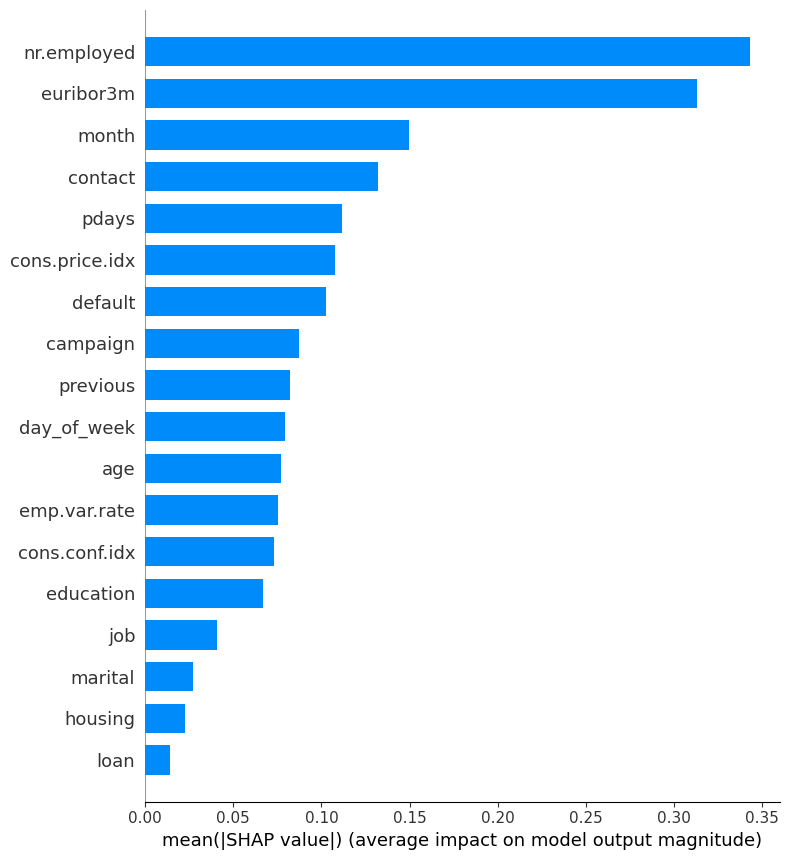

In [106]:
shap.summary_plot(shap_vals, X_val, plot_type="bar")

## 4.1.4 Unión 3 métodos

In [107]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
0,age,17.515419,17.515419,-0.010625,4.057502
9,euribor3m,13.783815,31.299234,0.680024,16.429536
1,campaign,8.075067,39.374302,0.129022,4.592754
11,job,8.028076,47.402378,0.309654,2.136050
7,education,7.462370,54.864747,0.122951,3.504753
15,nr.employed,6.976830,61.841577,1.252277,17.998596
5,day_of_week,5.699563,67.541140,0.173042,4.157922
16,pdays,5.068813,72.609953,0.983607,5.847459
6,default,4.200467,76.810420,0.083485,5.379479
13,marital,3.909918,80.720339,0.057681,1.423521


In [108]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
15,nr.employed,6.976830,61.841577,1.252277,17.998596
3,cons.price.idx,2.088583,96.532057,1.042805,5.652541
14,month,1.998346,98.530403,1.152095,7.867176


In [109]:
features = df_filt['feature']
features

15       nr.employed
3     cons.price.idx
14             month
Name: feature, dtype: object

In [110]:
X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

nr.employed       1.457901
cons.price.idx    1.465278
month             1.088055
dtype: float64

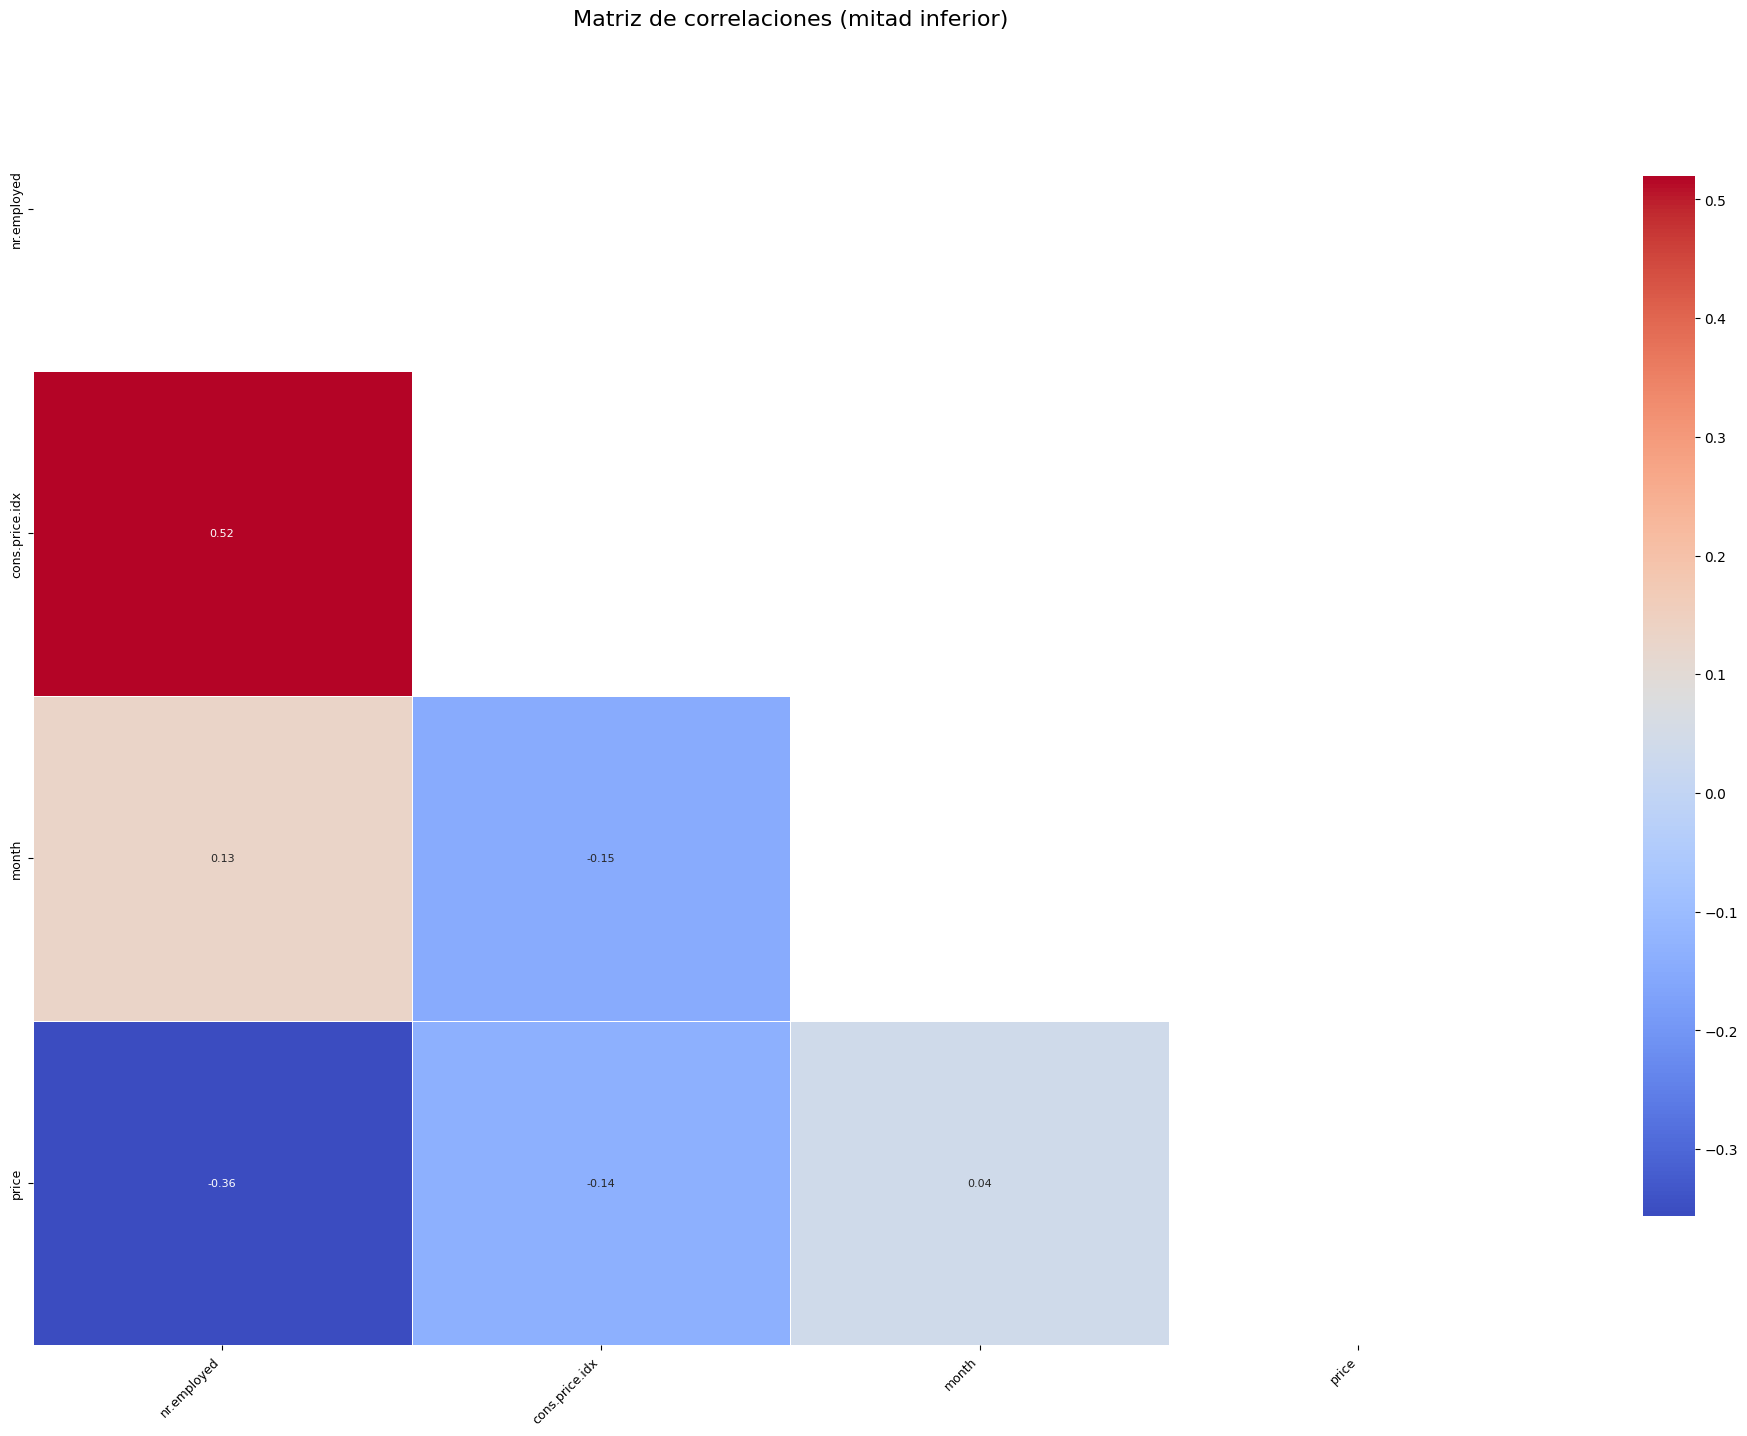

In [111]:
X_copy = X_train_imp[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

In [112]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestClassifier(random_state=42, n_jobs=-1), X_train_imp[features], y_train, cv=3, scoring='accuracy')

In [113]:
cv_results1.mean()

np.float64(0.8911961141469339)

In [114]:
# Versión 2: Eliminar nr.employed (única variable con alta correlación que pasó el filtro)
# Nota: euribor3m y emp.var.rate ya fueron filtradas por tener perm_imp < 1%
cv_results2 = cross_val_score(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    X_train_imp[features].drop([
        'nr.employed'  # correlación 0.95 con euribor3m (no en features), 0.91 con emp.var.rate (no en features)
    ], axis=1),
    y_train,
    cv=3,
    scoring='accuracy'
)

In [115]:
# Comparar resultados
print(f"Accuracy con todas las features: {cv_results1.mean():.4f} (+/- {cv_results1.std():.4f})")
print(f"Accuracy eliminando variables correlacionadas: {cv_results2.mean():.4f} (+/- {cv_results2.std():.4f})")
print(f"\nDiferencia: {(cv_results2.mean() - cv_results1.mean()):.4f}")

Accuracy con todas las features: 0.8912 (+/- 0.0011)
Accuracy eliminando variables correlacionadas: 0.8912 (+/- 0.0011)

Diferencia: 0.0000


# 5.1 Modelado

In [116]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train_imp[features]
X_test_sel = X_test_imp[features]

In [117]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
nr.employed,32940.0,5167.059405,72.374453,4963.600,5099.100,5191.000,5228.100,5228.100
cons.price.idx,32940.0,93.576831,0.578718,92.201,93.075,93.749,93.994,94.767
month,32940.0,6.612083,2.042961,3.000,5.000,6.000,8.000,12.000


In [118]:
model = LogisticRegression(random_state=42, max_iter=1000)


In [119]:
model.fit(X_train_sel, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 5.2 Escalamos los datos

In [120]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [121]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        solver='lbfgs',
        max_iter=2000,
        random_state=42,
        class_weight='balanced'
    )
)
model.fit(X_train_sel, y_train)

# Evaluar en datos de test
y_pred = model.predict(X_test_sel)
y_pred_proba = model.predict_proba(X_test_sel)

print("=== Evaluación en Test Set ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

=== Evaluación en Test Set ===
Accuracy: 0.7199



In [122]:
# Configuración de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Modelo A: sin escalado
model_a = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced')
results_a = cross_validate(model_a, X_train_sel, y_train, cv=cv, scoring=scoring)

# Modelo B: con escalado
model_b = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced'))
results_b = cross_validate(model_b, X_train_sel, y_train, cv=cv, scoring=scoring)

# Mostrar resultados comparativos
def resumen(resultados, nombre):
    return pd.DataFrame({
        'Modelo': nombre,
        'Accuracy': resultados['test_accuracy'].mean(),
        'Precision': resultados['test_precision'].mean(),
        'Recall': resultados['test_recall'].mean(),
        'F1': resultados['test_f1'].mean()
    }, index=[0])

df_comparativa = pd.concat([
    resumen(results_a, 'Sin escalado'),
    resumen(results_b, 'Con escalado')
], ignore_index=True)

print(df_comparativa.round(4))

         Modelo  Accuracy  Precision  Recall      F1
0  Sin escalado    0.7199     0.2427  0.7137  0.3622
1  Con escalado    0.7199     0.2427  0.7137  0.3622
